In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('job_salary_mean.csv')
data.head()

,Judul Pekerjaan,Perusahaan,Lokasi,Gaji_Rata2
0,Senior Customer Service,PT Higienis Indonesia,Jakarta Raya,10500000
1,Senior Customer Service,PT Higienis Indonesia,Jakarta Raya,9221095
2,Management Trainee Store Kalimantan,PT Richeese Kuliner Indonesia,Banjarmasin Selatan,5409910
3,Business Development Executive,PT Arupa Cloud Nusantara,Jakarta Selatan,10500000
4,Content Creator,PT. Cahaya Ayu Abadi,Kecamatan Tangerang,6000000


**Data Information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Judul Pekerjaan  32976 non-null  object
 1   Perusahaan       32976 non-null  object
 2   Lokasi           32976 non-null  object
 3   Gaji_Rata2       32976 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [4]:
data.describe()

,Gaji_Rata2
count,3.297600e+04
mean,7.238115e+06
std,3.162249e+06
min,1.000000e+06
25%,5.250246e+06
50%,6.273050e+06
75%,7.827476e+06
max,6.250000e+07


In [5]:
data.describe(include='object')

,Judul Pekerjaan,Perusahaan,Lokasi
count,32976,32976,32976
unique,8686,4969,606
top,B2B Consultant,"PT. BFI FINANCE INDONESIA, Tbk",Jakarta Selatan
freq,1316,1611,4224


**Data Cleansing**

In [6]:
import re
data['Judul Pekerjaan'] = (
    data['Judul Pekerjaan']
        .astype(str)                          # pastikan string
        .str.replace(r'[^A-Za-z0-9 ]', '', regex=True)  # hapus semua karakter selain huruf, angka & spasi
        .str.replace(r'\s+', ' ', regex=True) # rapikan spasi berlebih
        .str.strip()                          # trim
        .str.upper()                          # uppercase
)

In [7]:
import re
data['Perusahaan'] = (
    data['Perusahaan']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\b(PT|CV|TBK)\b', '', regex=True, case=False)  # hapus PT, CV, TBK
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

In [8]:
import re
data['Lokasi'] = (
    data['Lokasi']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\b(KABUPATEN|KECAMATAN|PROVINSI|KOTA)\b', '', regex=True, case=False)  # hapus PT, CV, TBK
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

In [9]:
data.duplicated().sum()

np.int64(22022)

In [10]:
data_drop = data.drop_duplicates(subset=['Judul Pekerjaan', 'Perusahaan', 'Lokasi','Gaji_Rata2'], keep='first')
data_drop

,Judul Pekerjaan,Perusahaan,Lokasi,Gaji_Rata2
0,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,10500000
1,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,9221095
2,MANAGEMENT TRAINEE STORE KALIMANTAN,RICHEESE KULINER INDONESIA,BANJARMASIN SELATAN,5409910
3,BUSINESS DEVELOPMENT EXECUTIVE,ARUPA CLOUD NUSANTARA,JAKARTA SELATAN,10500000
4,CONTENT CREATOR,CAHAYA AYU ABADI,TANGERANG,6000000
...,...,...,...,...
11290,ASSISTANT ACCOUNTING TAX MANAGER,TELMARK INTEGRASI INDONESIA,JAKARTA BARAT,11969098
11291,KEPALA CABANGTEAM LEADER NGADA NTT,AMARTHA MIKRO FINTEK JAKARTA,INDONESIA,7726331
11292,SERVICE MANAGER,X MOTORS INTERNASIONAL GROUP,JAKARTA RAYA,11831649
11293,BEAUTY ADVISOR TEAM LEADER YOGYAKARTA,SKINTIFIC,DI YOGYAKARTA,5643958


In [11]:
region = pd.read_excel("Region di Indonesia.xlsx")
region.head()

,Kota,Provinsi
0,Aceh Barat,Aceh
1,Aceh Barat Daya,Aceh
2,Aceh Besar,Aceh
3,Aceh Jaya,Aceh
4,Aceh Selatan,Aceh


In [12]:
region['Kota'] = region['Kota'].str.split(',')               # pisah jadi list
region = region.explode('Kota')                                # pecah jadi baris
region['Kota'] = region['Kota'].str.strip()                  # trim whitespace
print(region)

                Kota        Provinsi
0         Aceh Barat            Aceh
1    Aceh Barat Daya            Aceh
2         Aceh Besar            Aceh
3          Aceh Jaya            Aceh
4       Aceh Selatan            Aceh
..               ...             ...
865     Gondokusuman  DIY Yogyakarta
866         Cikajang      Jawa Barat
867            Gubug     Jawa Tengah
868            Patuk  DIY Yogyakarta
869         Gedebage      Jawa Barat

[870 rows x 2 columns]


In [13]:
import re
region['Kota'] = (
    region['Kota']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\b(KABUPATEN|KECAMATAN|PROVINSI|KOTA)\b', '', regex=True, case=False)  # hapus PT, CV, TBK
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

In [14]:
import re
region['Provinsi'] = (
    region['Provinsi']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\b(KABUPATEN|KECAMATAN|PROVINSI|KOTA)\b', '', regex=True, case=False)  # hapus PT, CV, TBK
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

In [15]:
region = region.drop_duplicates(subset='Kota', keep='first')
region

,Kota,Provinsi
0,ACEH BARAT,ACEH
1,ACEH BARAT DAYA,ACEH
2,ACEH BESAR,ACEH
3,ACEH JAYA,ACEH
4,ACEH SELATAN,ACEH
...,...,...
844,CIPUTAT TIMUR,BANTEN
851,KIBIN,BANTEN
855,HARJAMUKTI,JAWA BARAT
860,SARUDIK,SUMATERA UTARA


In [16]:
region['Kota'] = region['Kota'].astype(str).str.strip()
region['Provinsi'] = region['Provinsi'].astype(str).str.strip()

In [17]:
mapping_kota = dict(zip(region['Kota'], region['Provinsi']))
mapping_provinsi = dict(zip(region['Provinsi'], region['Provinsi']))

In [18]:
def cari_provinsi(lokasi):
    lokasi_clean = str(lokasi).strip().lower()

    # Cek kota dulu
    for kota, prov in mapping_kota.items():
        if kota.lower() in lokasi_clean:
            return prov

    # Cek provinsi ( kasus JAWA TIMUR )
    for prov in mapping_provinsi.keys():
        if prov.lower() in lokasi_clean:
            return prov

    return None

In [19]:
data_drop['Provinsi'] = data_drop['Lokasi'].apply(cari_provinsi)
data_drop

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\904759948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Provinsi'] = data_drop['Lokasi'].apply(cari_provinsi)


,Judul Pekerjaan,Perusahaan,Lokasi,Gaji_Rata2,Provinsi
0,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,10500000,DKI JAKARTA
1,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,9221095,DKI JAKARTA
2,MANAGEMENT TRAINEE STORE KALIMANTAN,RICHEESE KULINER INDONESIA,BANJARMASIN SELATAN,5409910,JAWA BARAT
3,BUSINESS DEVELOPMENT EXECUTIVE,ARUPA CLOUD NUSANTARA,JAKARTA SELATAN,10500000,DKI JAKARTA
4,CONTENT CREATOR,CAHAYA AYU ABADI,TANGERANG,6000000,BANTEN
...,...,...,...,...,...
11290,ASSISTANT ACCOUNTING TAX MANAGER,TELMARK INTEGRASI INDONESIA,JAKARTA BARAT,11969098,DKI JAKARTA
11291,KEPALA CABANGTEAM LEADER NGADA NTT,AMARTHA MIKRO FINTEK JAKARTA,INDONESIA,7726331,None
11292,SERVICE MANAGER,X MOTORS INTERNASIONAL GROUP,JAKARTA RAYA,11831649,DKI JAKARTA
11293,BEAUTY ADVISOR TEAM LEADER YOGYAKARTA,SKINTIFIC,DI YOGYAKARTA,5643958,DIY YOGYAKARTA


In [20]:
mapping = {
    "LAZADA CO ID": "DKI JAKARTA",
    "SCHNEIDER ELECTRIC": "DKI JAKARTA",
    "AMARTHA MIKRO FINTEK JAKARTA": "DKI JAKARTA",
    "TRINUSA TRAVELINDO": "DKI JAKARTA",
    "PERINDUSTRIAN SAWIT SYNERGI": "KALIMANTAN TIMUR"
}

# Apply perubahan hanya untuk nama perusahaan yang ada di mapping
data_drop["Provinsi"] = data_drop.apply(
    lambda row: mapping[row["Perusahaan"]] 
                if row["Perusahaan"] in mapping 
                else row["Provinsi"],
    axis=1
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\355399360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop["Provinsi"] = data_drop.apply(


In [21]:
def kategorikan_pekerjaan(judul):
    judul = str(judul).upper()

    for kategori, keywords in kategori_pekerjaan.items():
        for key in keywords:
            if key in judul:
                return kategori
    return 'Others'

**Data Wragling**

In [22]:
mapping_pulau = {

    # --- JAWA ---
    'DKI JAKARTA': 'JAWA',
    'JAWA BARAT': 'JAWA',
    'JAWA TENGAH': 'JAWA',
    'DIY YOGYAKARTA': 'JAWA',
    'JAWA TIMUR': 'JAWA',
    'BANTEN': 'JAWA',

    # --- SUMATERA ---
    'SUMATERA UTARA': 'SUMATERA',
    'SUMATERA BARAT': 'SUMATERA',
    'SUMATERA SELATAN': 'SUMATERA',
    'LAMPUNG': 'SUMATERA',
    'BENGKULU': 'SUMATERA',
    'JAMBI': 'SUMATERA',
    'ACEH': 'SUMATERA',
    'KEPULAUAN RIAU': 'SUMATERA',
    'KEPULAUAN KEPULAUAN RIAU': 'SUMATERA',   # koreksi nama dobel
    'BANGKA BELITUNG': 'SUMATERA',           # jika nanti muncul

    # --- KALIMANTAN ---
    'KALIMANTAN BARAT': 'KALIMANTAN',
    'KALIMANTAN SELATAN': 'KALIMANTAN',
    'KALIMANTAN TENGAH': 'KALIMANTAN',
    'KALIMANTAN TIMUR': 'KALIMANTAN',
    'KALIMANTAN UTARA': 'KALIMANTAN',

    # --- SULAWESI ---
    'SULAWESI UTARA': 'SULAWESI',
    'SULAWESI SELATAN': 'SULAWESI',
    'SULAWESI TENGGARA': 'SULAWESI',
    'SULAWESI TENGAH': 'SULAWESI',
    'GORONTALO': 'SULAWESI',
    'SULAWESI BARAT': 'SULAWESI',       # jaga-jaga jika muncul

    # --- BALI & NUSA TENGGARA ---
    'BALI': 'BALI & NUSA TENGGARA',
    'NUSA TENGGARA BARAT': 'BALI & NUSA TENGGARA',
    'NUSA TENGGARA TIMUR': 'BALI & NUSA TENGGARA',

    # --- MALUKU ---
    'MALUKU UTARA': 'MALUKU',
    'MALUKU': 'MALUKU',            # jika muncul

    # --- PAPUA ---
    'PAPUA': 'PAPUA',
    'PAPUA PAPUA TENGAH': 'PAPUA',   # koreksi nama
    'PAPUA BARAT': 'PAPUA',
    'PAPUA BARAT DAYA': 'PAPUA',     # jika muncul
}

In [23]:
def ambil_pulau(provinsi):
    provinsi = str(provinsi).upper().strip()
    return mapping_pulau.get(provinsi, 'LAINNYA')

In [24]:
data_drop['Pulau'] = data_drop['Provinsi'].apply(ambil_pulau)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\1930954019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Pulau'] = data_drop['Provinsi'].apply(ambil_pulau)


In [25]:
data_drop.duplicated().sum()

np.int64(0)

In [26]:
data_drop.isnull().sum()

Judul Pekerjaan     0
Perusahaan          0
Lokasi              0
Gaji_Rata2          0
Provinsi           10
Pulau               0
dtype: int64

In [27]:
kategori_jabatan = {

    'Internship / Magang': [
        'INTERN', 'MAGANG', 'INTERNSHIP'
    ],

    'Operator / Worker': [
        'OPERATOR', 'WORKER', 'HELPER', 'CREW',
        'KURIR', 'DRIVER', 'TEKNISI', 'TECHNICIAN'
    ],

    'Entry Level / Development Program': [
        'FRESH GRADUATE', 'ENTRY LEVEL',
        'MANAGEMENT TRAINEE', 'MT',
        'OFFICER DEVELOPMENT PROGRAM', 'ODP',
        'TRAINEE'
    ],

    'Staff Non Technical': [
        'STAFF', 'STAF', 'ADMIN', 'OFFICER', 'ASSOCIATE',
        'AGENT', 'CUSTOMER SERVICE', 'CS'
    ],

    'Staff Technical': [
        'ENGINEER', 'ANALYST', 'DEVELOPER', 'PROGRAMMER',
        'IT', 'DATA', 'SOFTWARE', 'NETWORK',
        'QA', 'QC', 'SURVEYOR', 'DESIGNER', 'DRAFTER'
    ],

    # ⭐ Digabung sesuai permintaan
    'Senior Staff / Supervisor': [
        'SENIOR', 'SNR', 'SPECIALIST',
        'SUPERVISOR', 'SPV', 'PIC', 'KOORDINATOR',
        'COORDINATOR', 'TEAM LEADER', 'LEAD', 'PENGAWAS'
    ],

    'Head Level / Assistant Manager': [
        'HEAD', 'HEAD OF', 'KABAG', 'KASIE',
        'SECTION HEAD', 'KEPALA BAGIAN', 'KEPALA',
        'ASISTEN MANAGER', 'ASSISTANT MANAGER'
    ],

    'Manager & Executive Level': [
        'MANAGER', 'MGR', 'GM', 'GENERAL MANAGER',
        'BRANCH MANAGER', 'AREA MANAGER', 'STORE MANAGER',
        'OPERATIONAL MANAGER', 'PROJECT MANAGER',
        'FINANCE MANAGER', 'SALES MANAGER', 'MARKETING MANAGER',
        'DIRECTOR', 'CEO', 'CFO', 'COO', 'CTO',
        'CMO', 'CPO', 'VP', 'AVP', 'SVP', 'PRESIDENT'
    ]
}

In [28]:
import re

kategori_pekerjaan_final = {
    # 20. Internship
    'Internship / Magang': [
        'INTERN', 'MAGANG', 'INTERNSHIP', 'TRAINEE'
    ],
    
    # 1. Medis
    'DOKTER': [
        'DOKTER', 'DR', 'DR.', 'MEDICAL DOCTOR', 'DOKTER UMUM',
        'DOKTER SPESIALIS', 'SPESIALIS', 'CLINIC DOCTOR'
    ],

    'TENAGA KESEHATAN': [
        'PERAWAT', 'NURSE', 'BIDAN', 'THERAPIST', 'KEPERAWATAN',
        'APOTEKER', 'PHARMACIST', 'PENUNJANG MEDIS'
    ],

    # 2. Engineering / Technical
    'Engineering & Technical': [
        'ENGINEER', 'MECHANICAL', 'ELECTRICAL', 'CIVIL', 'ESTIMATOR',
        'MAINTENANCE', 'TEKNISI', 'TECHNICIAN', 'QUALITY CONTROL',
        'QC', 'R&D', 'LAB', 'OPERATOR MESIN', 'DRAFTER', 'AUTOCAD',
        'PROJECT ESTIMATOR', 'QUANTITY SURVEYOR', 'QS',
        'ONSITE CONSTRUCTION', 'PENGAWAS PROYEK', 'PENGAWAS PELAKSANA',
        'PRIMAVERA', 'SCHEDULER', 'SPECIFIER', 'PANEL MAKER',
        'MEKANIK', 'HEAVY DIESEL', 'CHILLER', 'TECHNICAL SUPPORT',
        'TECHNICAL ASSISTANT', 'MECHANIC'
    ],

    # 3. IT & Data
    'IT & Data': [
        'DATA', 'ANALYST', 'IT', 'INFORMATION TECHNOLOGY',
        'PROGRAMMER', 'DEVELOPER', 'SOFTWARE', 'HARDWARE',
        'NETWORK', 'SYSTEM', 'CYBER', 'FULLSTACK', 'BACKEND',
        'FRONTEND', 'DATABASE', 'QA', 'DEVOPS', 'CLOUD',
        'AI', 'MACHINE LEARNING', 'PPC SPECIALIST'
    ],

    # 4. Manajemen
    'Manajemen': [
        'MANAGER', 'SUPERVISOR', 'HEAD', 'LEAD', 'LEADER',
        'COORDINATOR', 'EXECUTIVE', 'DIRECTOR', 'C-LEVEL',
        'VP', 'AVP', 'CHIEF', 'KABAG', 'KEPALA BAGIAN'
    ],

    # 5. Management Trainee
    'Management Trainee': [
        'MANAGEMENT TRAINEE', 'MT', 'OFFICER DEVELOPMENT PROGRAM',
        'ODP', 'LEADERSHIP PROGRAM', 'TALENT PROGRAM',
        'GRADUATE TRAINEE','MANAGEMENT DEVELOPMENT PROGRAM'
    ],

    # 6. Finance & Accounting
    'Finance & Accounting': [
        'FINANCE', 'ACCOUNTING', 'ACCOUNTS', 'TAX', 'PAJAK', 'AUDIT',
        'INTERNAL AUDITOR', 'ACCOUNTANT', 'AR', 'AP', 'TREASURY',
        'COST CONTROL', 'COST CONTROLLER', 'COST',
        'CASHIER', 'BILLING', 'FINANCIAL', 'BOOKKEEPER',
        'ACCOUNT PAYABLE', 'SETTLEMENT', 'UNDERWRITING',
        'KEUANGAN', 'AKUNTING','ACCOUTANT'
    ],

    # 7. Human Resource
    'Human Resource': [
        'HR', 'HUMAN RESOURCE', 'RECRUIT', 'RECRUITER', 'TALENT',
        'PEOPLE', 'HRGA', 'GA', 'PERSONALIA', 'PAYROLL', 'ACQUISITION',
        'TRAINING', 'L&D', 'ORGANIZATIONAL DEVELOPMENT', 'HRBP',
        'HC ORGANIZATION', 'COMPENSATION', 'BENEFIT', 'HRD',
        'HUMAN CAPITAL', 'CEO OFFICE SPECIALIST'
    ],

    # 8. Sales & Marketing
    'Sales & Marketing': [
        'SALES', 'ADVISOR', 'AE', 'BUSINESS DEVELOPMENT', 'BD',
        'ACCOUNT OFFICER', 'AO', 'ACCOUNT EXECUTIVE', 'ACCOUNT MANAGEMENT',
        'RELATIONSHIP OFFICER', 'KEY ACCOUNT', 'RELATIONSHIP MANAGER',
        'MARKETING', 'SPG', 'SPB', 'PROMOTOR', 'MERCHANDISER',
        'BRAND', 'CONTENT', 'SEO', 'SEM', 'DIGITAL MARKETING',
        'KAM', 'FIELD', 'PENJUALAN', 'SALESMAN','ACCOUNT',
        'SOCIAL MEDIA SPECIALIST', 'ADVERTISING', 'CAMPAIGN SPECIALIST',
        'EVENT ACTIVATION', 'EVENT AREA PROMOTION','TELEMARTETING',
        'KOL', 'ECOMMERCE', 'E-COMMERCE', 'ECOMMERCE SPECIALIST'
    ],

    # 9. Operasional
    'Operasional': [
        'OPERATION', 'OPERASIONAL', 'WAREHOUSE', 'GUDANG', 'LOGISTIK',
        'LOGISTICS', 'SUPPLY CHAIN', 'PROCUREMENT', 'PURCHASING',
        'INVENTORY', 'PLANNER', 'PPIC', 'DISTRIBUTION', 'FLEET',
        'STOREKEEPER', 'STORE KEEPER', 'PACKING', 'DELIVERY',
        'HOUSEKEEPER', 'HK', 'CHECKER', 'PACKAGING', 'PRODUKSI',
        'OPR PRODUKSI', 'PRODUCTION STAFF', 'LOGISTIC', 'LOGISTIK'
    ],

    # 10. Customer Service
    'Customer Service': [
        'CS', 'CUSTOMER SERVICE', 'CALL CENTER', 'CONTACT CENTER',
        'HELPDESK', 'CLIENT RELATION', 'TELESALES', 'FRONTLINER',
        'SERVICE ADVISOR', 'CUSTOMER CARE', 'TELLER',
        'TELEMARKETING', 'DESK', 'CUSTOMER SUCCESS',
        'CUSTOMER RELATION OFFICER'
    ],

    # 11. Hospitality & Retail
    'Hospitality & Retail': [
        'BARISTA', 'COOK', 'CHEF', 'WAITRESS', 'WAITERS', 'STORE CREW',
        'KASIR', 'CASHIER', 'RETAIL', 'FOH', 'BOH', 'BAKERY',
        'CATERING', 'RESTAURANT', 'HOTEL', 'HOUSEKEEPING',
        'CONCIERGE', 'JURU MASAK', 'TUKANG MASAK'
    ],

    # 12. Creative
    'Creative & Design': [
        'DESIGN', 'DESIGNER', 'GRAPHIC', 'UI', 'UX', 'PRODUCT DESIGN',
        'VIDEO', 'EDITOR', 'CREATIVE', 'ANIMATOR', 'PHOTOGRAPHER',
        'VIDEOGRAPHER', 'ILLUSTRATOR', 'MULTIMEDIA', 'PRESENTER',
        'GAME ARTIST', 'DESAINER INTERIOR'
    ],

    # 13. Education
    'Education & Training': [
        'TEACHER', 'GURU', 'TUTOR', 'INSTRUCTOR', 'TRAINER',
        'LECTURER', 'COACH', 'PENGAJAR', 'VICE PRINCIPAL',
        'EDUCATION COUNSELLOR', 'ENROLMENT OFFICER'
    ],

    # 14. Legal
    'Legal & Compliance': [
        'LEGAL', 'COMPLIANCE', 'PARALEGAL', 'LAW', 'REGULATORY',
        'CONTRACT', 'NOTARIS', 'PATENT'
    ],

    # 15. Driver & Labor
    'Driver & General Labor': [
        'DRIVER', 'SUPIR', 'KURIR', 'COURIER', 'OPERATOR',
        'CLEANING', 'OB', 'GENERAL', 'WORKER', 'LOADER',
        'SORTER', 'HELPER', 'DOGGER', 'RIGGER'
    ],

    # 16. Security
    'Security': [
        'SECURITY', 'SATPAM'
    ],

    # 17. HSE
    'HSE': [
        'HSE', 'SAFETY', 'K3', 'PROTECTION', 'FIRE', 'INSPECTOR'
    ],

    # 18. Property
    'Property & Real Estate': [
        'PROPERTY', 'AGENT', 'BROKER', 'LEASING', 'BUILDING',
        'ESTATE', 'APPRAISER'
    ],

    # 19. Media
    'Media & Communications': [
        'REPORTER', 'JOURNALIST', 'PUBLIC RELATIONS', 'PR',
        'COMMUNICATION', 'BROADCAST', 'HOST', 'ANNOUNCER',
        'SPEAKER', 'WEBINAR', 'TIKTOK'
    ],

    # 21. Translator
    'Translator & Interpreter': [
        'TRANSLATOR', 'INTERPRETER', 'MANDARIN', 'JAPANESE',
        'CHINESE', 'TERJEMAHAN'
    ],

    # 22. Personal Assistant
    'Personal Assistant': [
        'SECRETARY', 'SEKRETARIS','PERSONAL ASSISTANT',
        'ASISTEN DIREKSI','ASSISTANT'
    ],

    # 23. Administrasi
    'Administrasi': [
        'ADMIN', 'ADMINISTRASI', 'ADM', 'SECRETARY', 'SEKRETARIS',
        'RECEPTIONIST', 'FRONT OFFICE', 'BACK OFFICE', 'DOCUMENT CONTROL',
        'CLERK', 'ADMIN SUPPORT', 'ADMINISTRATION',
        'ADMINISTRATIVE', 'ADMINISTRATOR', 'PERSONAL ASSISTANT',
        'ASISTEN DIREKSI', 'OFFICE MANAGEMENT SUPPORT'
    ],

    # 24. Default
    'Others': [
        'FREELANCE', 'PART TIME', 'VOLUNTEER'
    ]
}


# --- Matching yang lebih akurat ---
def match_keyword(judul, keyword):
    keyword = keyword.upper()

    # Very short words must be whole word
    if len(keyword) <= 3:
        return re.search(rf'\b{re.escape(keyword)}\b', judul) is not None

    # Long keyword → substring match
    return keyword in judul


def kategorikan_pekerjaan(judul):
    judul = str(judul).upper()

    for kategori, keywords in kategori_pekerjaan_final.items():
        for key in keywords:
            if match_keyword(judul, key):
                return kategori
    return 'Others'

In [29]:
import re

kategori_jabatan = {
        'Internship / Magang': [
        'INTERN', 'MAGANG', 'INTERNSHIP'
    ],

    'Manager & Executive Level': [
        'MANAGER', 'MGR', 'GM', 'GENERAL MANAGER',
        'BRANCH MANAGER', 'AREA MANAGER', 'STORE MANAGER',
        'OPERATIONAL MANAGER', 'PROJECT MANAGER',
        'FINANCE MANAGER', 'SALES MANAGER', 'MARKETING MANAGER',
        'DIRECTOR', 'CEO', 'CFO', 'COO', 'CTO','COACH','CHIEF',
        'CMO', 'CPO', 'VP', 'AVP', 'SVP', 'PRESIDENT','OWNER'
    ],

    'Head Level / Assistant Manager': [
        'HEAD', 'HEAD OF', 'KABAG', 'KASIE',
        'SECTION HEAD', 'KEPALA BAGIAN', 'KEPALA',
        'ASISTEN MANAGER', 'ASSISTANT MANAGER'
    ],

    'Senior Staff / Supervisor': [
        'SENIOR', 'SNR', 'SPECIALIST',
        'SUPERVISOR', 'SPV', 'PIC', 'KOORDINATOR',
        'COORDINATOR', 'TEAM LEADER', 'LEAD', 'PENGAWAS'
    ],

    'Staff Technical': [
        'ENGINEER', 'ANALYST', 'DEVELOPER', 'PROGRAMMER',
        'IT', 'DATA', 'SOFTWARE', 'NETWORK',
        'QA', 'QC', 'SURVEYOR', 'DESIGNER', 'DRAFTER'
    ],

    'Staff Non Technical': [
        'STAFF', 'STAF', 'ADMIN', 'OFFICER', 'ASSOCIATE',
        'AGENT', 'CUSTOMER SERVICE', 'CS'
    ],

    'Entry Level / Development Program': [
        'FRESH GRADUATE', 'ENTRY LEVEL',
        'MANAGEMENT TRAINEE', 'MT',
        'OFFICER DEVELOPMENT PROGRAM', 'ODP',
        'TRAINEE'
    ],

    'Operator / Worker': [
        'OPERATOR', 'WORKER', 'HELPER', 'CREW',
        'KURIR', 'DRIVER', 'TEKNISI', 'TECHNICIAN'
    ]

}


def whole_word_in(text, word):
    return re.search(rf'\b{re.escape(word)}\b', text) is not None


def kategorikan_jabatan(judul):
    judul = str(judul).upper()

    ordered_categories = list(kategori_jabatan.keys())  # sudah urut dari atas ke bawah

    for kategori in ordered_categories:
        for key in kategori_jabatan[kategori]:
            if whole_word_in(judul, key):
                return kategori

    return 'Staff Non Technical'


In [30]:
data_drop['Category Job'] = data_drop['Judul Pekerjaan'].apply(kategorikan_pekerjaan)
data_drop['Job Level'] = data_drop['Judul Pekerjaan'].apply(kategorikan_jabatan)
data_drop

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\4038067866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Category Job'] = data_drop['Judul Pekerjaan'].apply(kategorikan_pekerjaan)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\4038067866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Job Level'] = data_drop['Judul Pekerjaan'].apply(kategorikan_jabatan)


,Judul Pekerjaan,Perusahaan,Lokasi,Gaji_Rata2,Provinsi,Pulau,Category Job,Job Level
0,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,10500000,DKI JAKARTA,JAWA,Customer Service,Senior Staff / Supervisor
1,SENIOR CUSTOMER SERVICE,HIGIENIS INDONESIA,JAKARTA RAYA,9221095,DKI JAKARTA,JAWA,Customer Service,Senior Staff / Supervisor
2,MANAGEMENT TRAINEE STORE KALIMANTAN,RICHEESE KULINER INDONESIA,BANJARMASIN SELATAN,5409910,JAWA BARAT,JAWA,Internship / Magang,Entry Level / Development Program
3,BUSINESS DEVELOPMENT EXECUTIVE,ARUPA CLOUD NUSANTARA,JAKARTA SELATAN,10500000,DKI JAKARTA,JAWA,Manajemen,Staff Non Technical
4,CONTENT CREATOR,CAHAYA AYU ABADI,TANGERANG,6000000,BANTEN,JAWA,Sales & Marketing,Staff Non Technical
...,...,...,...,...,...,...,...,...
11290,ASSISTANT ACCOUNTING TAX MANAGER,TELMARK INTEGRASI INDONESIA,JAKARTA BARAT,11969098,DKI JAKARTA,JAWA,Manajemen,Manager & Executive Level
11291,KEPALA CABANGTEAM LEADER NGADA NTT,AMARTHA MIKRO FINTEK JAKARTA,INDONESIA,7726331,DKI JAKARTA,JAWA,Manajemen,Head Level / Assistant Manager
11292,SERVICE MANAGER,X MOTORS INTERNASIONAL GROUP,JAKARTA RAYA,11831649,DKI JAKARTA,JAWA,Manajemen,Manager & Executive Level
11293,BEAUTY ADVISOR TEAM LEADER YOGYAKARTA,SKINTIFIC,DI YOGYAKARTA,5643958,DIY YOGYAKARTA,JAWA,Manajemen,Senior Staff / Supervisor


In [31]:
import re
data_drop['Category Job'] = (
    data_drop['Category Job']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\2338584388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Category Job'] = (


In [32]:
import re
data_drop['Job Level'] = (
    data_drop['Job Level']
        .astype(str)
        .str.replace(r'[^A-Za-z0-9 ]', ' ', regex=True)     # hapus karakter aneh
        .str.replace(r'\s+', ' ', regex=True)               # rapikan spasi
        .str.strip()
        .str.upper()
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\40655260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Job Level'] = (


In [33]:
import numpy as np
import pandas as pd

cols = ['Judul Pekerjaan','Perusahaan','Lokasi','Gaji_Rata2','Provinsi','Category Job','Job Level','Pulau']

# 1) Tampilkan baris yang "seharusnya" terhapus menurut kriteria: NaN OR empty/only-whitespace
mask_nan = data_drop[cols].isna().any(axis=1)
mask_empty = data_drop[cols].apply(lambda s: s.astype(str).str.replace('\xa0', ' ').str.strip() == '').any(axis=1)

problem_rows = data_drop[mask_nan | mask_empty]
print("Jumlah baris bermasalah:", len(problem_rows))
print(problem_rows.head(20))   # kalau di Jupyter, pakai display; kalau terminal pakai print


Jumlah baris bermasalah: 22
                                         Judul Pekerjaan  \
885    FULFILLMENT RESPONSIBLECUSTOMER SERVICE SUPERV...   
1276                                GENERAL AFFAIR ADMIN   
1312                   WATER MANAGEMENT RESEARCH OFFICER   
1405                                        HR RECRUITER   
2677                       PRODUCT MANAGEMENT SUPERVISOR   
2808                                                       
3020                                                       
3198                                       LEGAL OFFICER   
3488                                                       
3989                                   MANAGER ASSISTANT   
4022                                                       
5021                                                       
6854               MANAGER PERSONNEL ADMIN HR OPERATIONS   
7132                               FIELD COLLECTION DURI   
7668                   PEST ENTOMOLOGY ASSISTANT MANAGER   
7921        

In [34]:
# 2) Ganti string kosong / hanya spasi / non-breaking-space jadi NaN (lebih tahan banting)
data_drop[cols] = data_drop[cols].apply(
    lambda col: col.replace({r'^[\s\u00A0]*$': np.nan}, regex=True))

# 3) Sekarang dropna seperti semula
data_drop = data_drop.dropna(subset=cols)

# 4) Cek sisa yang masih bermasalah (seharusnya 0)
remaining = data_drop[cols].isna().any(axis=1).sum()
print("Sisa baris dengan NaN pada kolom penting:", remaining)

Sisa baris dengan NaN pada kolom penting: 0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18176\3182281985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[cols] = data_drop[cols].apply(


**Exploratory Data Analysis**

In [35]:
groupby_pekerjaan = (
    data_drop
        .groupby('Judul Pekerjaan')['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_pekerjaan

,Judul Pekerjaan,Gaji_Rata2
0,1 STAFF MARKETING LCLFCL CONSOL OVERSEAS AGENTWCA,5000000.0
1,1 SUPERVISOR FOOD DAN BEVERAGE 2 SUPERVISOR HO...,5202283.5
2,2024 COLLECTOR MOTORCYCLE PRODUCT BRANCH METRO,4962426.0
3,2025 ADMIN PROCESSING INTERNSHIP PALEMBANG,3826308.0
4,2025 AGENCY RELATION BULELENG,5759638.0
...,...,...
8286,WTP OPERATORPEKALONGAN,4962686.0
8287,WWTP ENGINEER,4563184.0
8288,XDR L2 ENGINEER,8286140.0
8289,YOUNG FINANCIAL ACADEMY YFA BALIKPAPAN SAMARINDA,6478466.0


In [36]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_category_job = (
    data_drop
        .groupby(['Category Job','Lokasi'])['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_category_job

,Category Job,Lokasi,Gaji_Rata2
0,ADMINISTRASI,BADUNG,"3,785,010"
1,ADMINISTRASI,BALI,"4,911,347"
2,ADMINISTRASI,BANDUNG,"5,142,757"
3,ADMINISTRASI,BANGKALAN,"5,007,358"
4,ADMINISTRASI,BEKASI,"3,992,844"
...,...,...,...
2018,TRANSLATOR INTERPRETER,SURABAYA,"13,834,373"
2019,TRANSLATOR INTERPRETER,TAMAN,"6,750,000"
2020,TRANSLATOR INTERPRETER,TANGERANG,"9,355,325"
2021,TRANSLATOR INTERPRETER,TARAKAN UTARA,"7,500,000"


In [37]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_category_job = (
    data_drop
        .groupby(['Category Job'])['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_category_job

,Category Job,Gaji_Rata2
0,ADMINISTRASI,"4,949,308"
1,CREATIVE DESIGN,"6,097,495"
2,CUSTOMER SERVICE,"5,210,375"
3,DOKTER,"10,920,285"
4,DRIVER GENERAL LABOR,"5,234,560"
5,EDUCATION TRAINING,"7,190,044"
6,ENGINEERING TECHNICAL,"7,158,380"
7,FINANCE ACCOUNTING,"5,959,570"
8,HOSPITALITY RETAIL,"5,805,762"
9,HSE,"5,673,299"


In [38]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_level_job = (
    data_drop
        .groupby('Job Level')['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_level_job

,Job Level,Gaji_Rata2
0,ENTRY LEVEL DEVELOPMENT PROGRAM,"6,335,189"
1,HEAD LEVEL ASSISTANT MANAGER,"7,833,237"
2,INTERNSHIP MAGANG,"2,875,242"
3,MANAGER EXECUTIVE LEVEL,"12,560,052"
4,OPERATOR WORKER,"5,021,107"
5,SENIOR STAFF SUPERVISOR,"7,132,594"
6,STAFF NON TECHNICAL,"6,073,159"
7,STAFF TECHNICAL,"7,184,668"


In [39]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_level_job = (
    data_drop
        .groupby('Provinsi')['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_level_job

,Provinsi,Gaji_Rata2
0,ACEH,"6,103,418"
1,BALI,"6,603,287"
2,BANGKA BELITUNG,"6,882,251"
3,BANTEN,"7,049,627"
4,BENGKULU,"6,344,178"
5,DIY YOGYAKARTA,"4,761,129"
6,DKI JAKARTA,"8,105,855"
7,GORONTALO,"5,902,857"
8,JAMBI,"6,223,706"
9,JAWA BARAT,"7,273,729"


In [40]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_category_job = (
    data_drop
        .groupby(['Pulau'])['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_category_job

,Pulau,Gaji_Rata2
0,BALI & NUSA TENGGARA,"6,757,405"
1,JAWA,"7,475,263"
2,KALIMANTAN,"7,149,824"
3,MALUKU,"6,811,896"
4,PAPUA,"7,352,658"
5,SULAWESI,"6,766,013"
6,SUMATERA,"6,902,264"


In [41]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_category_job = (
    data_drop
        .groupby(['Category Job','Job Level'])['Gaji_Rata2']
        .mean()
        .reset_index())
groupby_category_job

,Category Job,Job Level,Gaji_Rata2
0,ADMINISTRASI,HEAD LEVEL ASSISTANT MANAGER,"6,954,716"
1,ADMINISTRASI,SENIOR STAFF SUPERVISOR,"4,282,289"
2,ADMINISTRASI,STAFF NON TECHNICAL,"4,916,201"
3,CREATIVE DESIGN,OPERATOR WORKER,"2,650,000"
4,CREATIVE DESIGN,SENIOR STAFF SUPERVISOR,"8,190,028"
...,...,...,...
99,TENAGA KESEHATAN,SENIOR STAFF SUPERVISOR,"6,879,739"
100,TENAGA KESEHATAN,STAFF NON TECHNICAL,"5,532,735"
101,TENAGA KESEHATAN,STAFF TECHNICAL,"4,973,352"
102,TRANSLATOR INTERPRETER,SENIOR STAFF SUPERVISOR,"8,794,180"


In [42]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_category_job = (
    data_drop
        .groupby('Category Job')
        .agg(
            Gaji_Minimum = ('Gaji_Rata2', 'min'),
            Gaji_Rata2   = ('Gaji_Rata2', 'mean'),
            Gaji_Maksimum = ('Gaji_Rata2', 'max')
        )
        .reset_index()
)

groupby_category_job

,Category Job,Gaji_Minimum,Gaji_Rata2,Gaji_Maksimum
0,ADMINISTRASI,1875000,"4,949,308",12500000
1,CREATIVE DESIGN,2650000,"6,097,495",14000000
2,CUSTOMER SERVICE,2200000,"5,210,375",13000000
3,DOKTER,2875000,"10,920,285",37500000
4,DRIVER GENERAL LABOR,1850000,"5,234,560",10455362
5,EDUCATION TRAINING,2750000,"7,190,044",62500000
6,ENGINEERING TECHNICAL,1910000,"7,158,380",44878751
7,FINANCE ACCOUNTING,1500000,"5,959,570",30000000
8,HOSPITALITY RETAIL,2550000,"5,805,762",12000000
9,HSE,3000000,"5,673,299",7000000


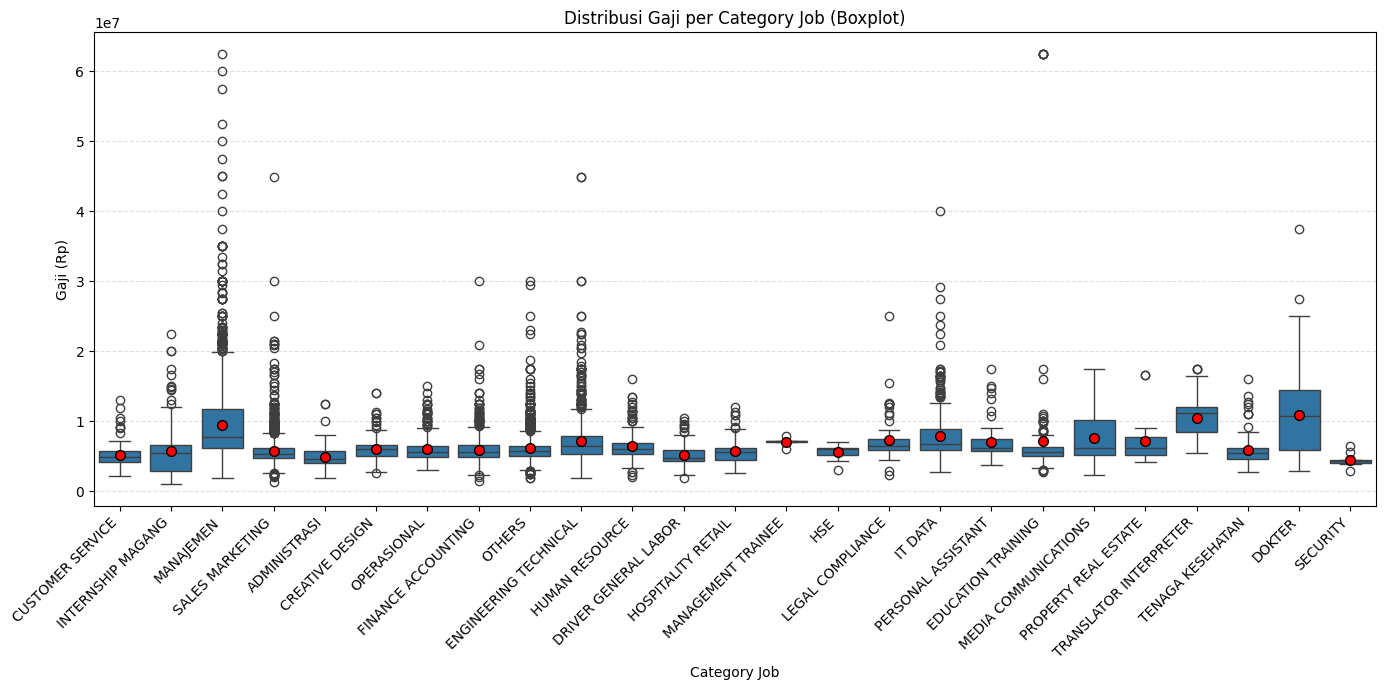

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

sns.boxplot(
    data=data_drop,
    x="Category Job",
    y="Gaji_Rata2",
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "red",
               "markeredgecolor": "black",
               "markersize": 7}
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Gaji (Rp)")
plt.title("Distribusi Gaji per Category Job (Boxplot)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

def remove_outliers_iqr(df, group_col, value_col):
    df_clean = data_drop.copy()

    # Menghitung IQR per category job
    Q1 = df_clean.groupby(group_col)[value_col].quantile(0.25)
    Q3 = df_clean.groupby(group_col)[value_col].quantile(0.75)
    IQR = Q3 - Q1

    # Membuat batas bawah dan atas per kategori
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Join batas ke dataframe
    df_clean = df_clean.join(lower_bound, on=group_col, rsuffix="_low")
    df_clean = df_clean.join(upper_bound, on=group_col, rsuffix="_up")

    # Filter data
    df_clean = df_clean[
        (df_clean[value_col] >= df_clean[value_col + "_low"]) &
        (df_clean[value_col] <= df_clean[value_col + "_up"])
    ].copy()

    # Hapus kolom batas
    df_clean.drop(columns=[value_col + "_low", value_col + "_up"], inplace=True)

    return df_clean

# --- Pemanggilan fungsi ---
data_clean = remove_outliers_iqr(
    data_drop,
    group_col="Category Job",
    value_col="Gaji_Rata2"   # ganti sesuai kolom gaji kamu
)

data_clean


,Judul Pekerjaan,Perusahaan,Lokasi,Gaji_Rata2,Provinsi,Pulau,Category Job,Job Level
2,MANAGEMENT TRAINEE STORE KALIMANTAN,RICHEESE KULINER INDONESIA,BANJARMASIN SELATAN,5409910,JAWA BARAT,JAWA,INTERNSHIP MAGANG,ENTRY LEVEL DEVELOPMENT PROGRAM
3,BUSINESS DEVELOPMENT EXECUTIVE,ARUPA CLOUD NUSANTARA,JAKARTA SELATAN,10500000,DKI JAKARTA,JAWA,MANAJEMEN,STAFF NON TECHNICAL
4,CONTENT CREATOR,CAHAYA AYU ABADI,TANGERANG,6000000,BANTEN,JAWA,SALES MARKETING,STAFF NON TECHNICAL
5,CUSTOMER SERVICE EXPORT,EVERGREEN SHIPPING AGENCY INDONESIA,JAKARTA SELATAN,5699571,DKI JAKARTA,JAWA,CUSTOMER SERVICE,STAFF NON TECHNICAL
6,ADMINISTRASI MEDIA PRODUCTION,DJOJONEGORO C 1000,JAKARTA SELATAN,6007823,DKI JAKARTA,JAWA,ADMINISTRASI,STAFF NON TECHNICAL
...,...,...,...,...,...,...,...,...
11290,ASSISTANT ACCOUNTING TAX MANAGER,TELMARK INTEGRASI INDONESIA,JAKARTA BARAT,11969098,DKI JAKARTA,JAWA,MANAJEMEN,MANAGER EXECUTIVE LEVEL
11291,KEPALA CABANGTEAM LEADER NGADA NTT,AMARTHA MIKRO FINTEK JAKARTA,INDONESIA,7726331,DKI JAKARTA,JAWA,MANAJEMEN,HEAD LEVEL ASSISTANT MANAGER
11292,SERVICE MANAGER,X MOTORS INTERNASIONAL GROUP,JAKARTA RAYA,11831649,DKI JAKARTA,JAWA,MANAJEMEN,MANAGER EXECUTIVE LEVEL
11293,BEAUTY ADVISOR TEAM LEADER YOGYAKARTA,SKINTIFIC,DI YOGYAKARTA,5643958,DIY YOGYAKARTA,JAWA,MANAJEMEN,SENIOR STAFF SUPERVISOR


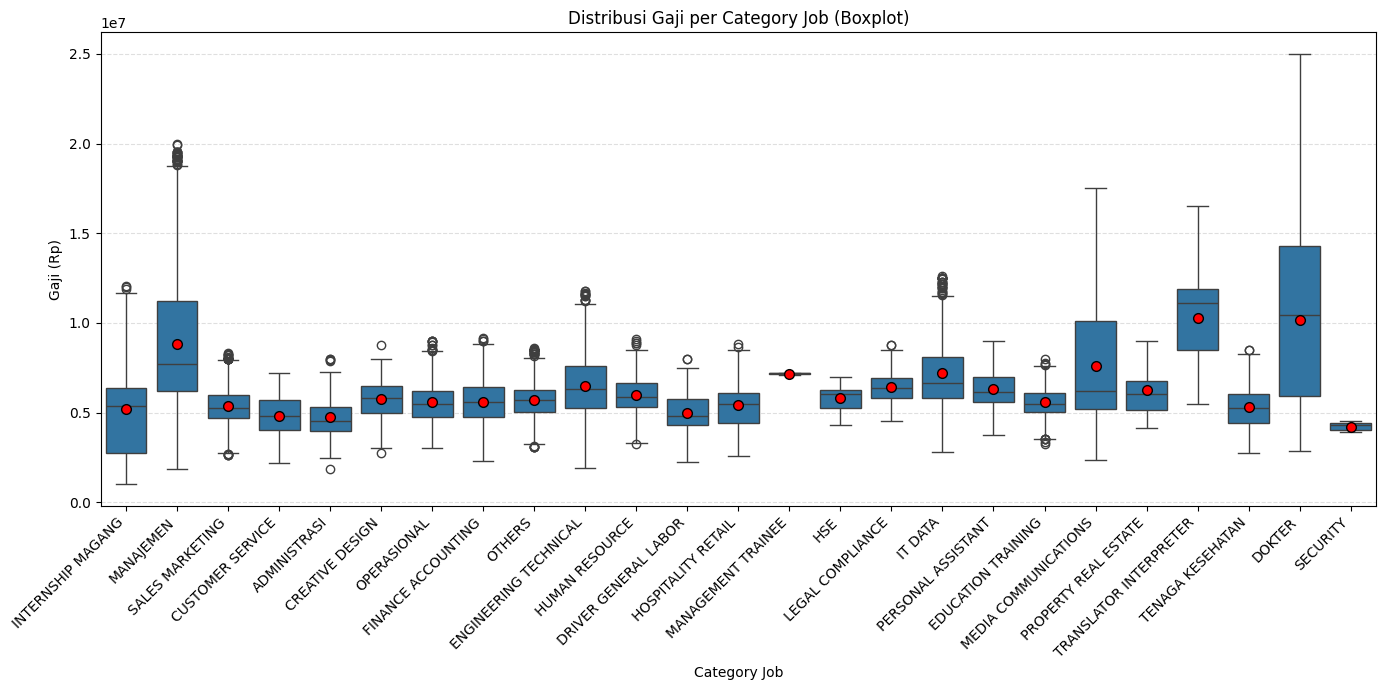

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

sns.boxplot(
    data=data_clean,
    x="Category Job",
    y="Gaji_Rata2",
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "red",
               "markeredgecolor": "black",
               "markersize": 7}
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Gaji (Rp)")
plt.title("Distribusi Gaji per Category Job (Boxplot)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [46]:
pd.set_option('display.float_format', '{:,.0f}'.format)
groupby_job_level = (
    data_drop
        .groupby('Job Level')
        .agg(
            Gaji_Minimum = ('Gaji_Rata2', 'min'),
            Gaji_Rata2   = ('Gaji_Rata2', 'mean'),
            Gaji_Maksimum = ('Gaji_Rata2', 'max')
        )
        .reset_index()
)

groupby_job_level


,Job Level,Gaji_Minimum,Gaji_Rata2,Gaji_Maksimum
0,ENTRY LEVEL DEVELOPMENT PROGRAM,3250000,"6,335,189",17313191
1,HEAD LEVEL ASSISTANT MANAGER,2550000,"7,833,237",60000000
2,INTERNSHIP MAGANG,1000000,"2,875,242",7000000
3,MANAGER EXECUTIVE LEVEL,3000000,"12,560,052",62500000
4,OPERATOR WORKER,1850000,"5,021,107",10000000
5,SENIOR STAFF SUPERVISOR,1850000,"7,132,594",30000000
6,STAFF NON TECHNICAL,1250000,"6,073,159",44878751
7,STAFF TECHNICAL,2750000,"7,184,668",44878751


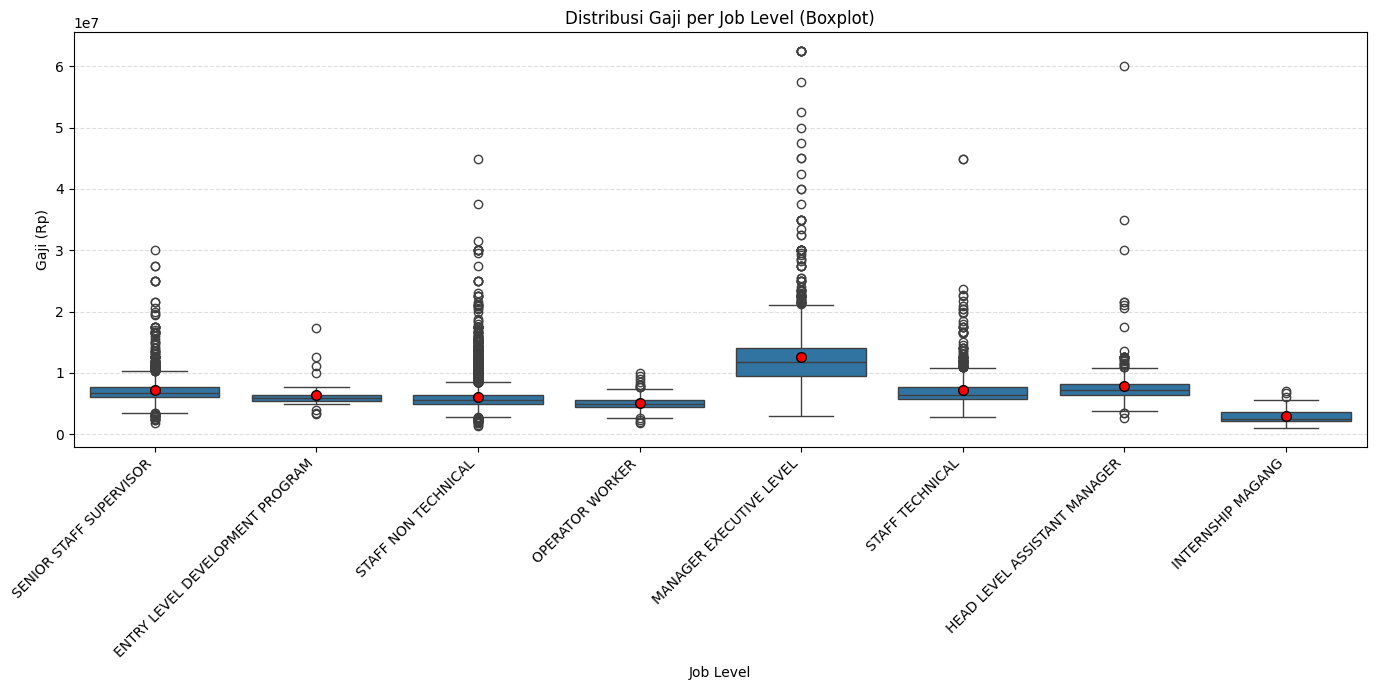

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

sns.boxplot(
    data=data_drop,
    x="Job Level",
    y="Gaji_Rata2",
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "red",
               "markeredgecolor": "black",
               "markersize": 7}
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Gaji (Rp)")
plt.title("Distribusi Gaji per Job Level (Boxplot)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

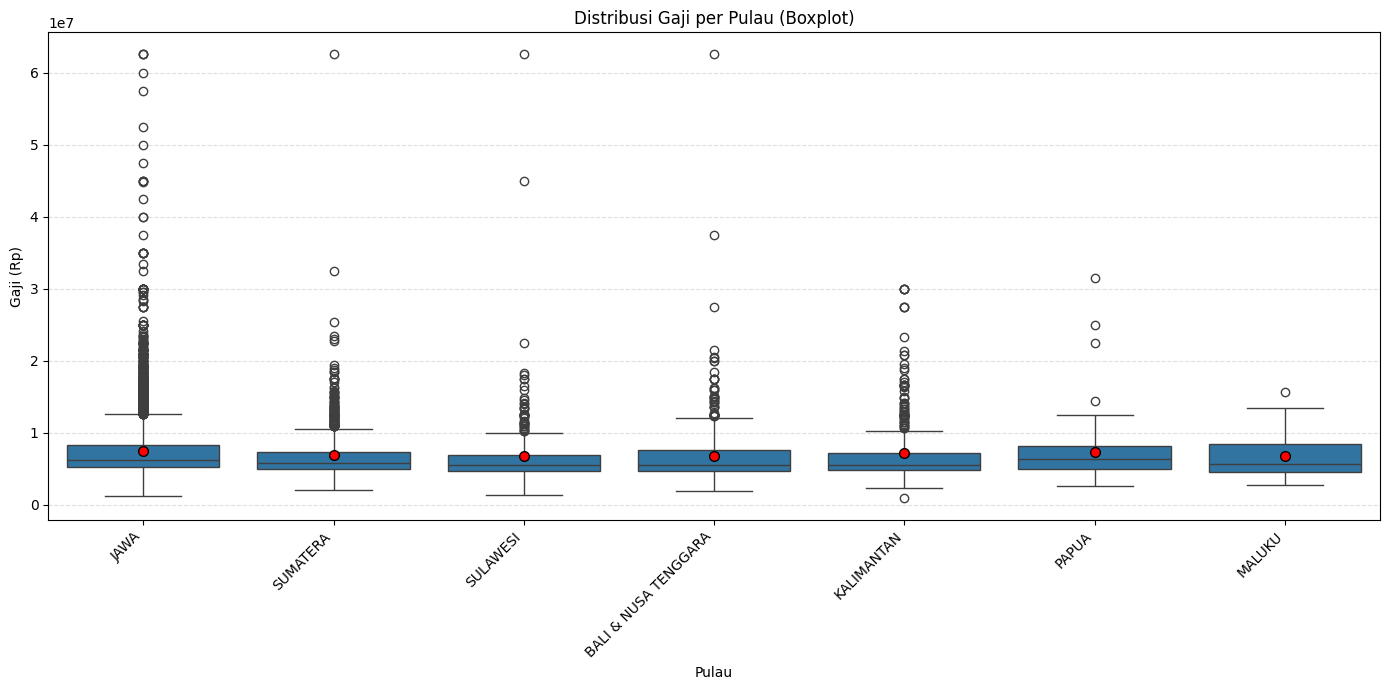

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

sns.boxplot(
    data=data_drop,
    x="Pulau",
    y="Gaji_Rata2",
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "red",
               "markeredgecolor": "black",
               "markersize": 7}
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Gaji (Rp)")
plt.title("Distribusi Gaji per Pulau (Boxplot)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()